# For Students MNIST Classification with KNN 

Finish this by creating a classifier and evaluating/tweaking its performance. Some of the code will be provided, some you have to add or modify. 

Using "classic" MNIST and fashion-MNIST

Labels for fashion MNIST:

0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from random import randrange

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

Pandas version : 2.2.2
Numpy version  : 1.26.4
Matplot version: 3.9.2
Seaborn version: 0.13.2
Sklearn version: 1.5.1
--------------
2025-03-21 09:58:12.922132


## Some utility functions

In [4]:
def whatis(d):
#############################################    
    print("Type : ", type(d))
    print("Shape: ", d.shape)

In [5]:
###############################################################
def showDigit(X, y, idx):
    ''' given a feature set, and label, and index, display
        the digit and correponding label at the given idx '''
    
    im = X.iloc[idx].to_numpy().reshape(28,28)
    plt.figure(figsize=(2, 2))
    plt.imshow(im, cmap=plt.cm.Blues)
    plt.axis("off")
    
    plt.show()
    print('Label: %d ' %(y.iloc[idx]))
    print(30*'-')

In [6]:
###############################################################
def showBits(pixels):
    ''' given a bitstring display the digit '''
    
    im = pixels.to_numpy().reshape(28,28)
    plt.figure(figsize=(2, 2))
    plt.imshow(im, cmap=plt.cm.Greens)
    plt.axis("off")
    plt.show()
    print(30*'-')

In [7]:
####################################
def findLabel(y, label):
    '''find the index for given label'''
    return list(y).index(label)

## Read the file, create X and y

In [9]:
df=pd.read_csv('../Data/mnist_data.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X=df.drop('label', axis=1)
y=df['label']
y.shape, X.shape

((10000,), (10000, 784))

In [12]:
df.label.value_counts()

label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 59.8 MB


## train/test split with test_size=0.2 and random_state =42

In [15]:
# your code here ...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display several images with their labels randomly

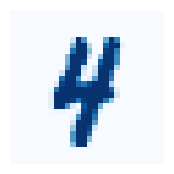

Label: 4 
------------------------------


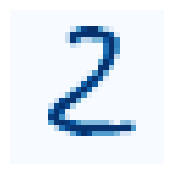

Label: 2 
------------------------------


In [17]:
HOW_MANY =2

for i in range (HOW_MANY):
    showDigit(X_train, y_train, randrange(100))

### find a specific image to display with its label

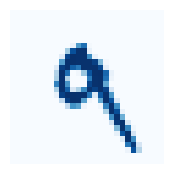

Label: 9 
------------------------------


In [19]:
looking_for_label = 9

idx=findLabel(y, looking_for_label)
showDigit(X, y, idx)


### find a random bitstring and display it as a digit

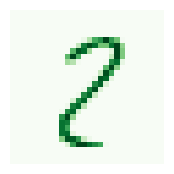

------------------------------


In [21]:
digit = X_train.iloc[randrange(500),:]
showBits(digit)

## Create your classifier ... you take it from here .. 

1. examine your CM, 
2. accuracy (is that a good one - what does it depend on? 
3. look at the classification report
4. do a grid search to find the best value for k (easy for dataset 1, more challening for dataset 2)

# DOING GRIDSEARCH TO FIND BEST K

In [24]:
print('--------------')
print(pd.Timestamp.now())
st = pd.Timestamp.now()

--------------
2025-03-21 09:58:14.857973


In [ ]:
# grid search here


In [26]:
print('--------------')
print(pd.Timestamp.now())
en = pd.Timestamp.now()
print('Time elapsed: ', en-st)

--------------
2025-03-21 09:58:14.874931
Time elapsed:  0 days 00:00:00.016958
